In [1]:
import importlib
import local_support  

importlib.reload(local_support)


from local_support import *

Training for regression


In [2]:
cloud_dataset = np.load('datasets/train_subset_500k.npz')

In [3]:
X_train_set = cloud_dataset['X_train']
y_train_set = cloud_dataset['y_train']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
train_set = (X_train, y_train)

X_train shape: (400000, 2)
X_test shape: (100000, 2)
y_train shape: (400000,)
y_test shape: (100000,)


In [5]:

best_regressor, best_params  = cross_validate(
    train_data=(X_train_set, y_train_set), 
    model_class=regressors['linear_regression'], 
    param_grid=param_grids_regressor['linear_regression'], 
    metric='neg_mean_squared_error',  # Use the correct scoring for MSE
    num_fold=5
)

Average R²: 0.06918106855129383
Average MSE: 0.17331283241510392
Best R²: 0.08750106898343601


In [6]:
folder_path = 'model_train/regressor'
file_path = os.path.join(folder_path, 'fill_nan_model_ln.pkl')
joblib.dump(best_regressor, file_path)

['model_train/regressor/fill_nan_model_ln.pkl']

###########################################################################

In [22]:
data = np.load('datasets/ndvi_vh_vv_raw_data.npz')
fill_nan_model = joblib.load('model_train/regressor/500points/fill_nan_model_ln.pkl')

In [15]:
vh = data['vh']
vv = data['vv']
ndvi = data['nvdi']


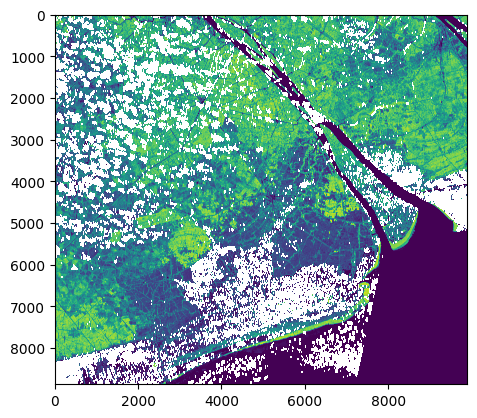

In [16]:
plt.imshow(ndvi[6], vmin=0, vmax=1)

In [23]:
filled_ndvi = np.copy(ndvi)

In [18]:
mask = ~np.isnan(ndvi)

In [19]:
X_pred = np.stack([vh[~mask], vv[~mask]], axis=1)

In [24]:
filled_ndvi[~mask] = fill_nan_model.predict(X_pred)

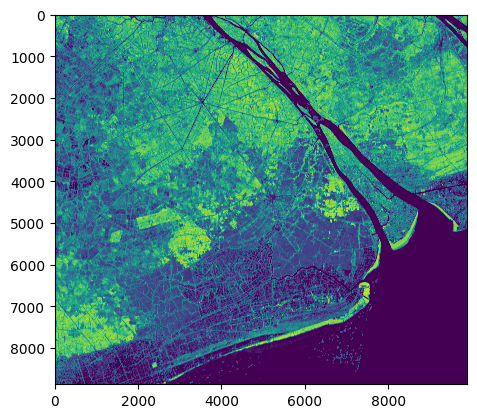

In [25]:
plt.imshow(filled_ndvi[6], vmin=0, vmax=1)


In [10]:
np.savez('rf_filled_cloud.npz', ndvi=filled_ndvi, vv=vv, vh=vh)

################################################################################

In [ ]:
X__draw_500, _, y_draw_500, _ = train_test_split(X_test, y_test, test_size=X_test.shape[0] - 500, random_state=42)

In [50]:
vhvv_test = np.stack([vh[0][0][0:500], vv[0][0][0:500]], axis=1)

actual_200_ndvi = ndvi[0][0][0:500]
predicted_200_ndvi = fill_nan_model.predict(vhvv_test)


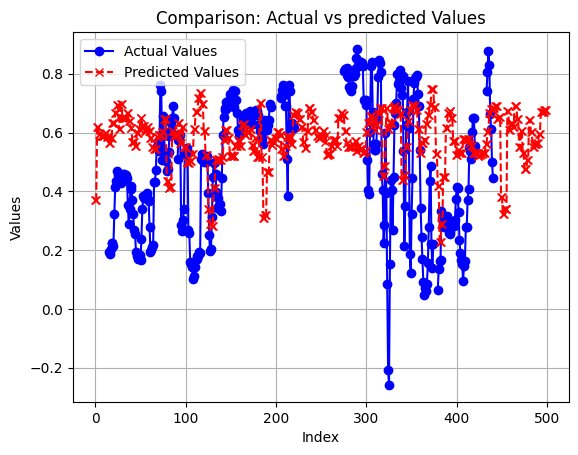

In [51]:
import matplotlib.pyplot as plt

# Sample data
actual_values = [10, 15, 7, 10, 5]
adjusted_values = [12, 13, 9, 11, 6]

# Plotting the actual values
plt.plot(actual_200_ndvi, marker='o', linestyle='-', color='b', label='Actual Values')

# Plotting the adjusted values
plt.plot(predicted_200_ndvi, marker='x', linestyle='--', color='r', label='Predicted Values')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison: Actual vs predicted Values')

# Adding grid
plt.grid(True)

# Adding legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()


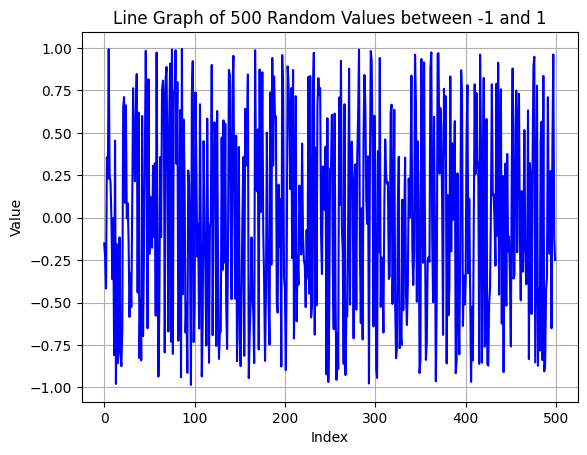

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 500 random values between -1 and 1
random_values = np.random.uniform(-1, 1, 500)

# Plotting the line graph
plt.plot(random_values, marker='', linestyle='-', color='b', label='Random Values')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Graph of 500 Random Values between -1 and 1')

# Adding grid
plt.grid(True)

# Display the plot
plt.show()
